In [1]:
import pandas as pd

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Machine Learning Packages
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Prediction Metrics
from sklearn.metrics import classification_report, accuracy_score

## Load all of the pickles from data folder

In [2]:
from os import listdir, getcwd
from pathlib import Path
def load_data():
    """
    Loads the timeline data from the data folder.
    """
    # Join file locaition from absolute path to root
    ROOT_PATH = str(Path(getcwd()).parents[0])
    DATA_LOC = ROOT_PATH + '/old_data/'
    
    # try to get Get all directory file names
    files_names = listdir(DATA_LOC)
    
    # Check Type
    valid_file_names = [f for f in files_names if f.split('.')[1] == 'pkl']
    
    # Load Pickle Files
    dataframes = []
    for filename in valid_file_names:
        with open(DATA_LOC+filename, 'rb') as f:
            df = pd.read_pickle(f)
            dataframes.append(df)
    return dataframes

In [3]:
dataframes = load_data()

In [4]:
# Successfully got all of the data!
len(dataframes)

36

In [5]:
# Combines the dataframes
df = pd.concat(dataframes)

In [6]:
df.shape

(21439, 34)

In [7]:
df.columns

Index(['blue_gold', 'blue_cs', 'blue_jg', 'blue_xp', 'red_gold', 'red_cs',
       'red_jg', 'red_xp', 'blue_wards_placed', 'blue_wards_destroyed',
       'blue_air_dragons', 'blue_fire_dragons', 'blue_earth_dragons',
       'blue_ocean_dragons', 'blue_turrets_destroyed', 'blue_rift_heralds',
       'blue_inhibitors_destroyed', 'blue_kills', 'blue_assists',
       'blue_deaths', 'red_wards_placed', 'red_wards_destroyed',
       'red_air_dragons', 'red_fire_dragons', 'red_earth_dragons',
       'red_ocean_dragons', 'red_turrets_destroyed', 'red_rift_heralds',
       'red_inhibitors_destroyed', 'red_kills', 'red_assists', 'red_deaths',
       'unix_date', 'winner'],
      dtype='object')

## Next, let's get an overview of the data we're working with
### Features
Each feature listed below is split into different teams, with the prefixes of "blue_" and "red_".
<ul> 
<li>Gold: Total gold accumulated. (Gold can be used to purchase items which can increase a player's strength.)</li>
<li>CS: Number creeps killed. (Killing a creep gives different amounts of gold.)</li>
<li>JG: Number of jungle creeps killed. (Same as above.)</li>
<li>XP: Total experience accumulated. (This is gained from killing enemies, being in the vicinity of a creep kill, or killing an object.</li>
<li>Wards Placed: Number of wards placed. (Wards reveal areas of the map to spot enemies.)</li>
<li>Wards Destroyed: Number of enemy wards destroyed.</li>
<li>Dragons: Number of that type of dragon killed. (Different dragon types give different advantages to the team that kills them.)</li>
<li>Heralds: Number of heralds killed. (These give gold, xp, and when used can do significant damage to towers.)</li>
<li>Turrets Destroyed: Number of enemy turrets destroyed. (Killing a turret opens up parts of the map.)</li>
<li>Inhibs Destroyed: Number of enemy inhibitors destroyed. (Killing an inhib allows your team to have stronger creeps in that lane.)</li>
<li>Kills: Number of enemies killed.</li>
<li>Assists: Number of assists on an enemy killed.</li>
<li>Deaths: Number of deaths of the team.</li>
</ul>

### Target
Winner: The team which one the game.

In [8]:
# We have no nulls and everything is an integer besides our target.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21439 entries, 0 to 535
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   blue_gold                  21439 non-null  int64 
 1   blue_cs                    21439 non-null  int64 
 2   blue_jg                    21439 non-null  int64 
 3   blue_xp                    21439 non-null  int64 
 4   red_gold                   21439 non-null  int64 
 5   red_cs                     21439 non-null  int64 
 6   red_jg                     21439 non-null  int64 
 7   red_xp                     21439 non-null  int64 
 8   blue_wards_placed          21439 non-null  int64 
 9   blue_wards_destroyed       21439 non-null  int64 
 10  blue_air_dragons           21439 non-null  int64 
 11  blue_fire_dragons          21439 non-null  int64 
 12  blue_earth_dragons         21439 non-null  int64 
 13  blue_ocean_dragons         21439 non-null  int64 
 14  blue_tur

In [9]:
df.describe()

,blue_gold,blue_cs,blue_jg,blue_xp,red_gold,red_cs,red_jg,red_xp,blue_wards_placed,blue_wards_destroyed,...,red_fire_dragons,red_earth_dragons,red_ocean_dragons,red_turrets_destroyed,red_rift_heralds,red_inhibitors_destroyed,red_kills,red_assists,red_deaths,unix_date
count,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,...,21439.000000,21439.000000,21439.0,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,21439.000000,2.143900e+04
mean,26125.170577,317.290219,80.762536,28908.258548,26081.882737,318.146882,82.716545,29007.999114,40.769112,5.877653,...,0.210784,0.213536,0.0,0.595923,0.361771,0.001726,11.505900,12.134988,11.560800,1.622149e+12
std,2872.718432,41.504391,15.387452,2131.335855,2827.210897,41.810842,15.494057,2145.935681,41.937878,3.694309,...,0.407875,0.409812,0.0,0.830557,0.481397,0.043698,4.611358,6.110763,4.700124,8.572837e+09
min,16727.000000,116.000000,4.000000,17222.000000,15032.000000,126.000000,0.000000,18046.000000,3.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.607601e+12
25%,24119.500000,291.000000,71.000000,27513.000000,24119.000000,292.000000,72.000000,27607.000000,23.000000,3.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,8.000000,8.000000,8.000000,1.614763e+12
50%,25947.000000,319.000000,80.000000,28913.000000,25927.000000,320.000000,83.000000,29030.000000,28.000000,5.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,11.000000,11.000000,11.000000,1.620584e+12
75%,27956.000000,346.000000,91.000000,30308.000000,27871.500000,347.000000,92.000000,30439.000000,37.000000,8.000000,...,0.000000,0.000000,0.0,1.000000,1.000000,0.000000,14.000000,16.000000,14.000000,1.630544e+12
max,37991.000000,459.000000,146.000000,37024.000000,40144.000000,468.000000,144.000000,37272.000000,522.000000,46.000000,...,1.000000,1.000000,0.0,7.000000,2.000000,2.000000,37.000000,46.000000,35.000000,1.637361e+12


### Distribution of target
We have a good distribution of the target variable! These are from random samples, so maybe we can assume our data is also normally distributed?

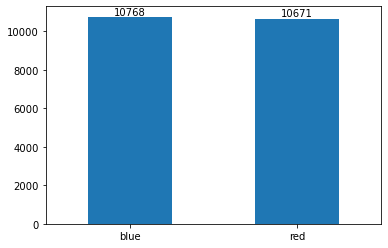

In [10]:
ax = df['winner'].value_counts().plot.bar(rot=0)
for container in ax.containers:
    ax.bar_label(container)
plt.show()

### Distributions of the target in regards to the features

In [11]:
def compare_by_winner(feature, data):
    # Get subset with winner
    sub_blue = data[data['winner'] == 'blue']
    sub_red = data[data['winner'] == 'red']

    cols = [col for col in data.columns if feature.lower() in col.lower()]

    fig, ax = plt.subplots(1, 2, figsize=(10, 8))

    # Plot when blue wins
    sns.boxplot(ax=ax[0], data=sub_blue[cols])
    ax[0].set_title("Blue Win")

    # Plot when red wins
    sns.boxplot(ax=ax[1], data=sub_red[cols])
    ax[1].set_title("Red Win")


### Gold

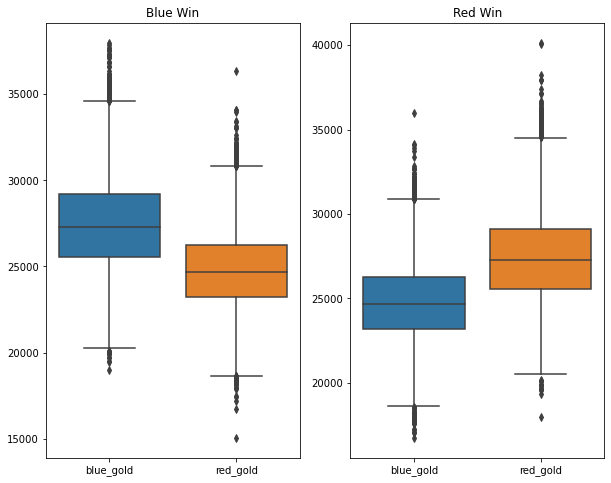

In [12]:
compare_by_winner('gold', df)

### Creep Score (CS)

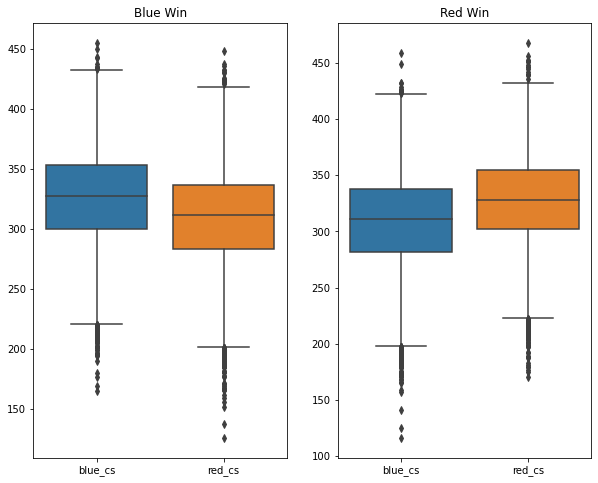

In [13]:
compare_by_winner('cs', df)

### Experience (XP)

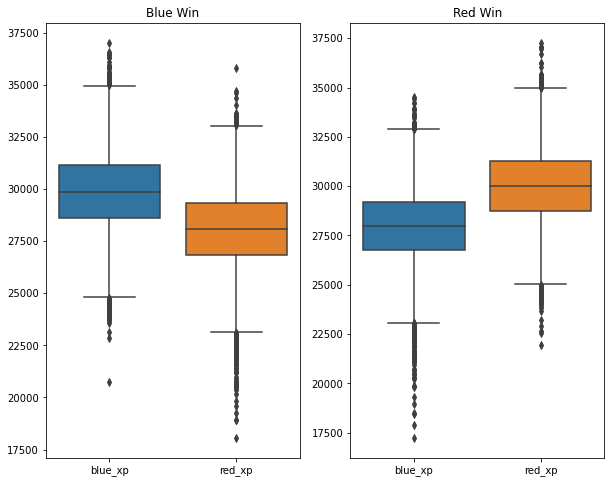

In [14]:
compare_by_winner('xp', df)

### Jungle (JG)

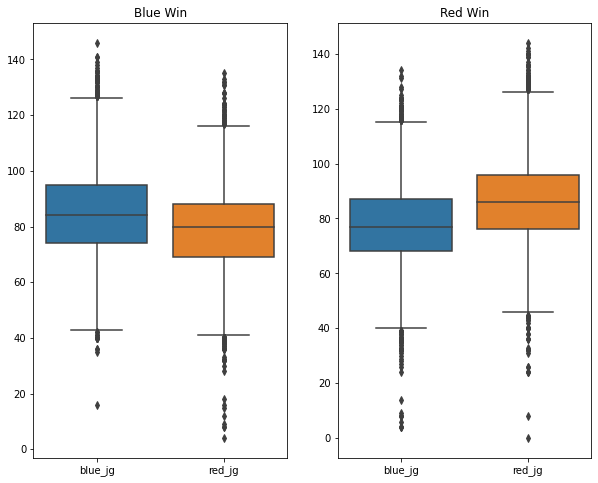

In [15]:
compare_by_winner('jg', df)

### Wards Placed

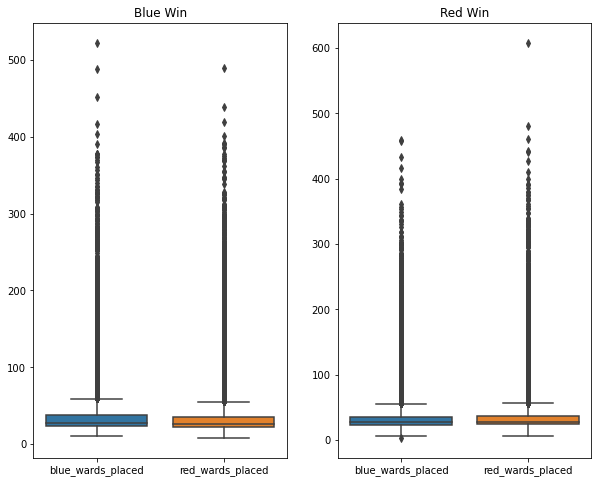

In [16]:
compare_by_winner('wards_placed', df)

### Wards Destroyed

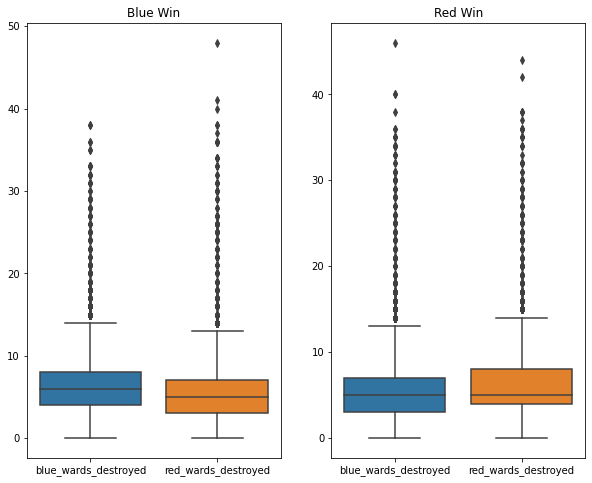

In [17]:
compare_by_winner('wards_destroyed', df)

### Fire Dragons

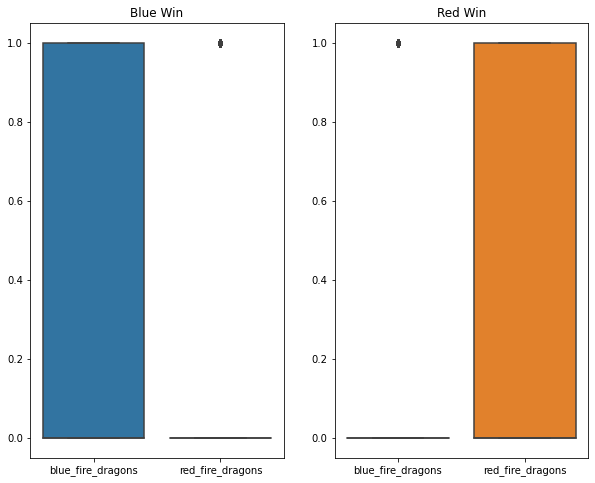

In [18]:
compare_by_winner('fire_dragons', df)

### Air Dragons

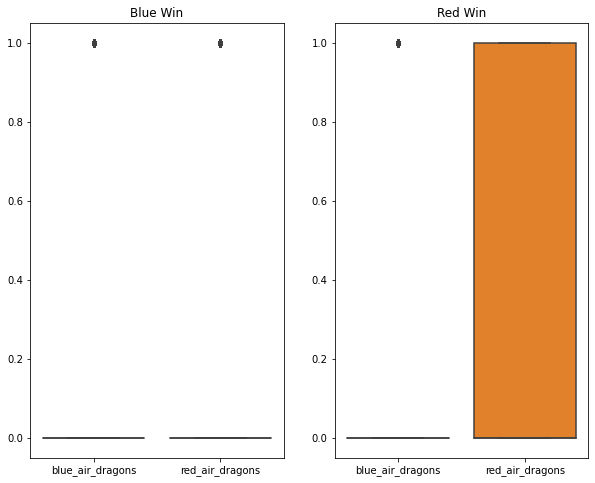

In [19]:
compare_by_winner('air_dragons', df)

### Water Dragons

ValueError: min() arg is an empty sequence

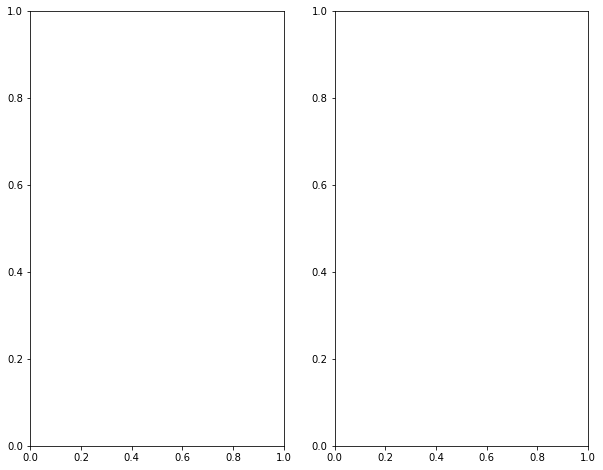

In [20]:
compare_by_winner('water_dragons', df)

### Earth Dragons

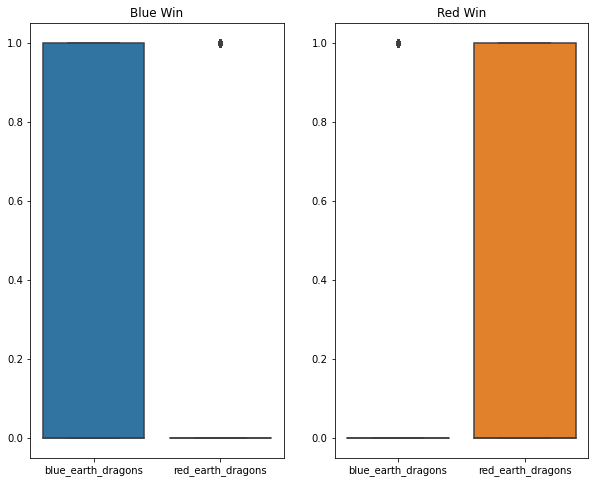

In [21]:
compare_by_winner('earth_dragons', df)

### Heralds

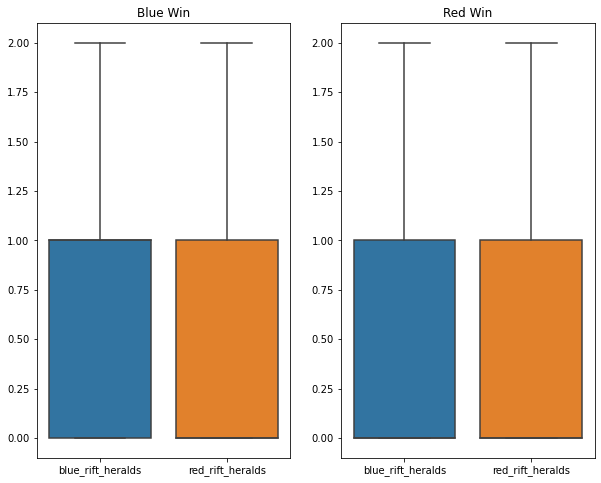

In [22]:
compare_by_winner('heralds', df)

### Turrets Destroyed

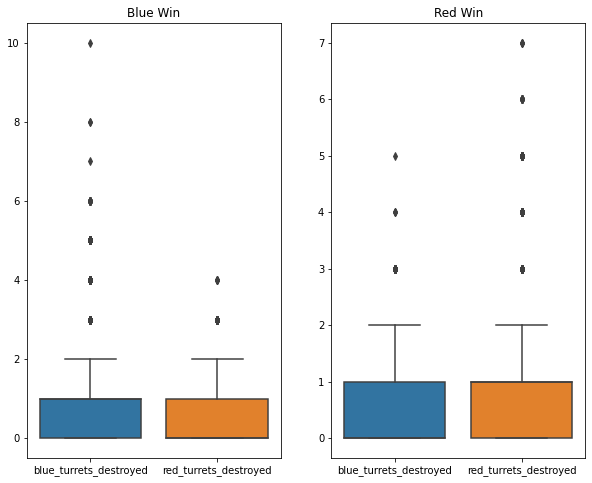

In [23]:
compare_by_winner('turrets_destroyed', df)

### Inhibs Destroyed

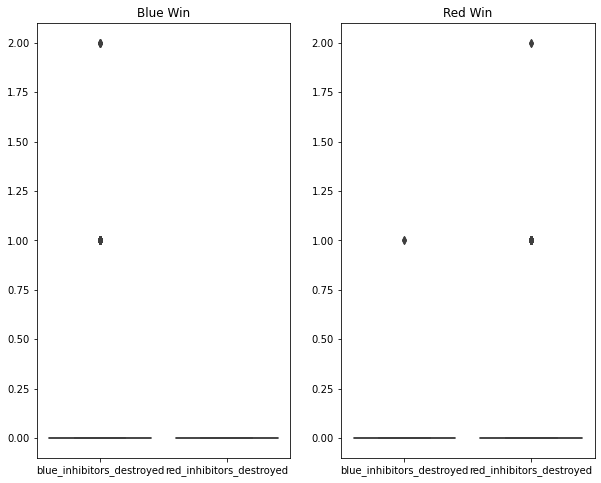

In [24]:
compare_by_winner('inhibitors_destroyed', df)

## Now, let's look at the distribution of some of our features

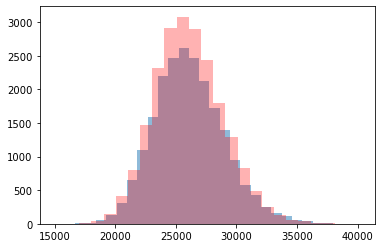

In [25]:
plt.hist(x=df['blue_gold'], bins=25, alpha=0.5)
plt.hist(x=df['red_gold'], bins=25, color='red', alpha=0.3)
plt.show()

### Experience

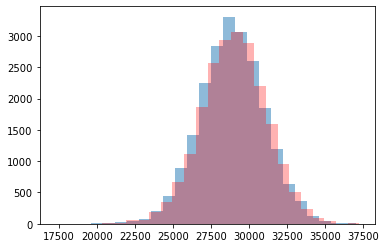

In [26]:
plt.hist(x=df['blue_xp'], bins=25, alpha=0.5)
plt.hist(x=df['red_xp'], bins=25, color='red', alpha=0.3)
plt.show()

## Now, let's prepare this dataset for the models

First, let's remove the values which have colinearity with each other. For example, blue kills = red deaths, blue deaths = red kills, etc.

In [27]:
df.head(5)

,blue_gold,blue_cs,blue_jg,blue_xp,red_gold,red_cs,red_jg,red_xp,blue_wards_placed,blue_wards_destroyed,...,red_earth_dragons,red_ocean_dragons,red_turrets_destroyed,red_rift_heralds,red_inhibitors_destroyed,red_kills,red_assists,red_deaths,unix_date,winner
0,21961,234,60,25322,28203,283,75,31039,118,1,...,0,0,0,1,0,21,16,7,1633923136937,red
1,23422,254,88,29506,18657,257,64,26349,262,1,...,0,0,0,0,0,1,1,8,1629527340849,blue
2,20091,239,56,25876,27529,299,79,33763,132,3,...,1,0,0,1,0,19,10,5,1629870336519,red
3,27195,312,68,28746,19338,230,60,22732,113,5,...,0,0,0,0,0,3,3,15,1628074071639,blue
4,23802,317,80,28406,24998,282,94,27305,22,3,...,0,0,1,0,0,10,15,6,1629618169838,red


In [32]:
# Seperate target and features
prep_df = df.drop(['red_kills', 'red_deaths', 'winner'], axis=1)
target = df['winner']

### Standardize values

In [33]:
min_max_scalar = MinMaxScaler()

In [34]:
X = min_max_scalar.fit_transform(prep_df)

In [42]:
random_state=101

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25, random_state=random_state)

## Logistic Regression CV

In [45]:
logm = LogisticRegressionCV(cv=5, random_state=random_state, max_iter=4000)
logm.fit(X_train, y_train)
predictions = logm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.78      0.78      0.78      2693
         red       0.78      0.78      0.78      2667

    accuracy                           0.78      5360
   macro avg       0.78      0.78      0.78      5360
weighted avg       0.78      0.78      0.78      5360



## Support Vector Classifier

In [47]:
svm = SVC(random_state=random_state)
svm.fit(X_train, y_train)
predictions = svm.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.78      0.77      0.78      2693
         red       0.77      0.78      0.78      2667

    accuracy                           0.78      5360
   macro avg       0.78      0.78      0.78      5360
weighted avg       0.78      0.78      0.78      5360



## KNN With GridSearch

In [51]:
knn_grid_params = {
    'n_neighbors': [3, 5, 11, 19],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn = KNeighborsClassifier()
knn_gs = GridSearchCV(knn, knn_grid_params, verbose=1, cv=3)
knn_gs.fit(X_train, y_train)
print(knn_gs.best_params_)
predictions = knn_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
              precision    recall  f1-score   support

        blue       0.77      0.77      0.77      2693
         red       0.77      0.77      0.77      2667

    accuracy                           0.77      5360
   macro avg       0.77      0.77      0.77      5360
weighted avg       0.77      0.77      0.77      5360



## Gaussian Naive Bayes

In [52]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        blue       0.64      0.95      0.76      2693
         red       0.90      0.46      0.61      2667

    accuracy                           0.71      5360
   macro avg       0.77      0.71      0.69      5360
weighted avg       0.77      0.71      0.69      5360



## Random Forest Classification

In [54]:
rf_grid_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}
rf = RandomForestClassifier(random_state=random_state, n_jobs=-1)
rf_gs = GridSearchCV(rf, rf_grid_params, verbose=1, cv=3)
rf_gs.fit(X_train, y_train)
print(rf_gs.best_params_)
predictions = rf_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
{'criterion': 'gini', 'max_features': 'log2', 'min_samples_split': 4, 'n_estimators': 200}
              precision    recall  f1-score   support

        blue       0.79      0.79      0.79      2693
         red       0.78      0.79      0.79      2667

    accuracy                           0.79      5360
   macro avg       0.79      0.79      0.79      5360
weighted avg       0.79      0.79      0.79      5360



## ExtraTrees Classifier

In [57]:
et_grid_params = {
    'n_estimators': [10, 50, 100],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2']
}
et = ExtraTreesClassifier(random_state=random_state)
et_gs = GridSearchCV(et, et_grid_params, verbose=1, cv=3, n_jobs=-1)
et_gs.fit(X_train, y_train)
print(et_gs.best_params_)
predictions = et_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 54 candidates, totalling 162 fits
{'criterion': 'gini', 'max_features': 'auto', 'min_samples_split': 2, 'n_estimators': 100}
              precision    recall  f1-score   support

        blue       0.79      0.79      0.79      2693
         red       0.79      0.79      0.79      2667

    accuracy                           0.79      5360
   macro avg       0.79      0.79      0.79      5360
weighted avg       0.79      0.79      0.79      5360



## AdaBoost Classifier

In [58]:
ada_grid_params = {
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.9, 0.95, 1.0, 1.05, 1.1]
}
ada = AdaBoostClassifier(random_state=random_state)
ada_gs = GridSearchCV(ada, ada_grid_params, verbose=1, cv=3, n_jobs=-1)
ada_gs.fit(X_train, y_train)
print(ada_gs.best_params_)
predictions = ada_gs.predict(X_test)
print(classification_report(y_test, predictions))

Fitting 3 folds for each of 15 candidates, totalling 45 fits
{'learning_rate': 0.9, 'n_estimators': 100}
              precision    recall  f1-score   support

        blue       0.77      0.77      0.77      2693
         red       0.77      0.77      0.77      2667

    accuracy                           0.77      5360
   macro avg       0.77      0.77      0.77      5360
weighted avg       0.77      0.77      0.77      5360

